In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    Flatten,
    Dropout,
    MaxPooling2D,
    MaxPool2D,
)
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt


In [70]:
path = Path('data')
X_train = np.load(path/'X_train.npy')
y_train = np.load(path/'y_train.npy')
X_test = np.load(path/'X_test.npy')
y_test = np.load(path/'y_test.npy')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((233, 16, 16, 1), (233, 4), (59, 16, 16, 1), (59, 4))

In [71]:
EPOCHS = 1000
BATCH_SIZE = 16
IMG_SIZE = X_train.shape[1]

In [72]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    height_true = y_true[:,3] - y_true[:,1] 
    width_true = y_true[:,2] - y_true[:,0] 

    height_pred = yhat[:,3] - yhat[:,1] 
    width_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(width_true - width_pred) + tf.square(height_true-height_pred))
    
    return delta_coord + delta_size

optimizer = Adam(learning_rate=0.001)

In [73]:
nn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    Flatten(),
    Dense(units=8, activation='relu'),
    Dense(units=4)
])


In [74]:
nn.compile(
    optimizer=optimizer,
    loss=localization_loss,
    # callbacks=[]
    )

In [75]:
history = nn.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), verbose=1)

Epoch 1/1000
15/15 [==============================] - 1s 43ms/step - loss: 5.1556 - val_loss: 4.3938
Epoch 2/1000
15/15 [==============================] - 0s 6ms/step - loss: 4.4326 - val_loss: 4.0307
Epoch 3/1000
15/15 [==============================] - 0s 6ms/step - loss: 4.1800 - val_loss: 3.8182
Epoch 4/1000
15/15 [==============================] - 0s 6ms/step - loss: 3.9071 - val_loss: 3.5575
Epoch 5/1000
15/15 [==============================] - 0s 7ms/step - loss: 3.6520 - val_loss: 3.3583
Epoch 6/1000
15/15 [==============================] - 0s 7ms/step - loss: 3.3233 - val_loss: 3.0392
Epoch 7/1000
15/15 [==============================] - 0s 7ms/step - loss: 2.9463 - val_loss: 2.5172
Epoch 8/1000
15/15 [==============================] - 0s 7ms/step - loss: 2.6660 - val_loss: 2.1916
Epoch 9/1000
15/15 [==============================] - 0s 9ms/step - loss: 2.3569 - val_loss: 1.9817
Epoch 10/1000
15/15 [==============================] - 0s 7ms/step - loss: 2.0086 - val_loss: 1.939

<AxesSubplot: >

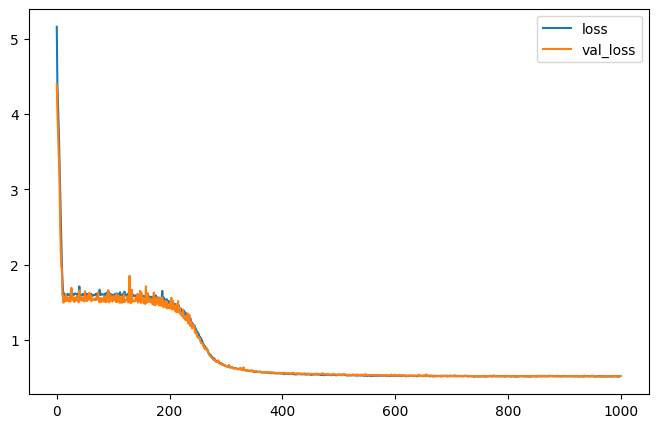

In [76]:
pd.DataFrame(history.history).plot(figsize=(8, 5))


In [77]:
nn.predict(X_test[:1])[0]

1/1 [==============================] - 0s 68ms/step


array([0.04411006, 0.19712925, 0.28935483, 0.5751218 ], dtype=float32)

1/1 [==============================] - 0s 24ms/step
[0.6307644  0.22499712 0.28987592 0.5772433 ]
1/1 [==============================] - 0s 24ms/step
[-0.00155054  0.19496024  0.2893143   0.5749567 ]
1/1 [==============================] - 0s 27ms/step
[0.2576627  0.20727365 0.28954452 0.57589406]
1/1 [==============================] - 0s 25ms/step
[0.2513808  0.20697524 0.28953895 0.57587135]
1/1 [==============================] - 0s 26ms/step
[0.29028773 0.20882344 0.2895735  0.5760121 ]
1/1 [==============================] - 0s 27ms/step
[0.03390335 0.1966444  0.28934577 0.5750849 ]


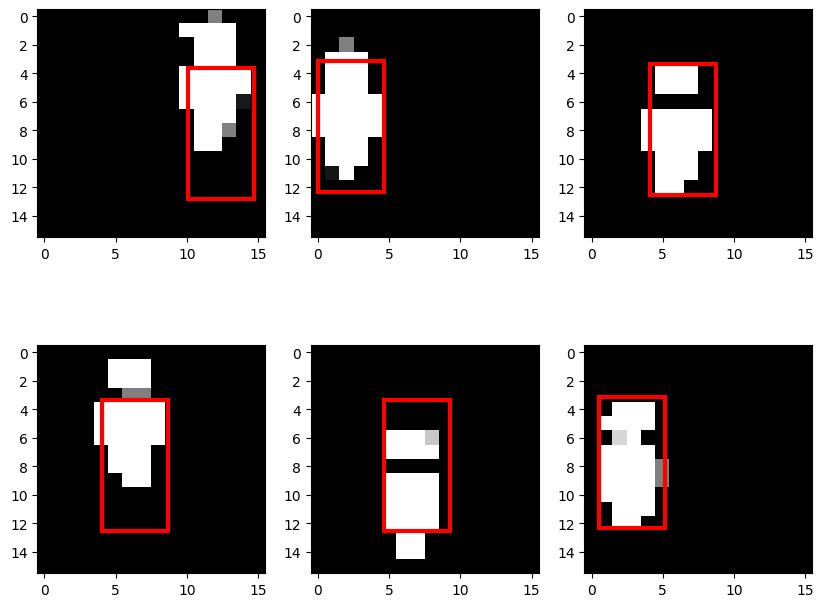

In [78]:
fig, ax = plt.subplots(2, 3, figsize=(10, 8))
images = np.random.choice(X_test.shape[0], 6)

for i in range(2):
    for j in range(3):
        index = np.random.randint(0, X_test.shape[0])
        rect = nn.predict(X_test[index:index+1])[0]
        print(rect)
        x, y, w, h = rect
        ax[i, j].add_patch(
            plt.Rectangle(
                (x * IMG_SIZE, y * IMG_SIZE),
                w * IMG_SIZE,
                h * IMG_SIZE,
                fill=False,
                edgecolor="red",
                lw=3,
            )
            )
        # draw true rect 
        
        ax[i, j].imshow(X_test[index], cmap="gray")
plt.show()
